# Testing Logic
---
* num_episodes (Number of Training Episodes)
    * Purpose: Determines how long the agent will train, i.e., how many complete episodes it experiences.
    * Logical Thinking:
        * Increasing: Allows the agent to explore more of the environment and refine its policy, especially in complex environments.
        * Decreasing: Saves computational time but risks insufficient exploration, resulting in poor learning.
---
* alpha (Learning Rate)
    * Purpose: Controls how much new information updates the Q-values or weights in each step
        * Typical range is 0.1 ≤ alpha ≤ 0.5
    * Logical Thinking:
        * Increasing: Allows faster learning by making large updates, which can help in dynamic environments or when initial values are poor.
        * Decreasing: Makes learning more stable by limiting large updates, reducing the chance of overshooting optimal values.
---
* gamma (Discount Factor)
    * Purpose: Balances the importance of immediate versus future rewards
        * Typically set close to 1
    * Logical Thinking:
        * Increasing(γ to 1): Emphasizes long-term rewards, which is crucial in environments with delayed rewards.
        * Decreasing(γ to 0): Focuses on immediate rewards, useful for short-term tasks or when planning far ahead is unnecessary.
---
* epsilon (Initial Exploration Rate)
    * Purpose: Controls the agent’s willingness to explore random actions versus exploiting known actions during the epsilon-greedy strategy
    * Logical Thinking:
        * Increasing: Encourages more exploration, useful in environments where early discovery of rewards is critical.
        * Decreasing: Encourages more exploitation, leveraging the current knowledge of the policy.
---
* epsilon_decay (Decay Rate for Exploration)
    * Purpose: Gradually reduces epsilon, transitioning from exploration to exploitation over episodes.
    * Logical Thinking:
        * Increasing: Prolongs exploration, which is useful in larger or more complex environments.
        * Decreasing: Focuses on exploitation earlier, which is useful when the environment is simple or training time is limited.
---
* min_epsilon (Minimum Exploration Rate)
    * Purpose: Ensures that the agent always explores to some extent, even late in training, to avoid getting stuck in suboptimal policies.
    * Logical Thinking:
        * Increasing: Maintains a higher level of exploration, which is safer but can slow convergence.
        * Decreasing: Focuses purely on exploitation as training progresses, which is riskier in complex environments.
---
* max_steps (Maximum Steps per Episode)
    * Purpose: Limits the number of steps an agent can take in each episode"play-through".
    * Logical Thinking:
        * Increasing: Allows more opportunities to achieve long-term rewards but increases computation time.
        * Decreasing: Enforces stricter goals, which can speed up training but risks missing important transitions.


# Hyperparameter Configurations

In [ ]:
# Hyperparameter configurations for experiments
configurations = {
    "FrozenLake": {
        "q_learning": [
            {"num_episodes": 50000, "alpha": 0.5, "gamma": 0.99, "epsilon": 1.0, "epsilon_decay": 0.99995, "min_epsilon": 0.01, "max_steps": 100},
            {"num_episodes": 30000, "alpha": 0.4, "gamma": 0.95, "epsilon": 1.0, "epsilon_decay": 0.9999, "min_epsilon": 0.05, "max_steps": 100},
            {"num_episodes": 20000, "alpha": 0.3, "gamma": 0.9, "epsilon": 0.8, "epsilon_decay": 0.9998, "min_epsilon": 0.02, "max_steps": 100},
            {"num_episodes": 10000, "alpha": 0.6, "gamma": 0.99, "epsilon": 1.0, "epsilon_decay": 0.9995, "min_epsilon": 0.01, "max_steps": 100},
        ],
        "approx_q_learning": [
            {"num_episodes": 50000, "alpha": 0.5, "gamma": 0.99, "epsilon": 1.0, "epsilon_decay": 0.99995, "min_epsilon": 0.01, "max_steps": 100},
            {"num_episodes": 30000, "alpha": 0.4, "gamma": 0.95, "epsilon": 1.0, "epsilon_decay": 0.9999, "min_epsilon": 0.02, "max_steps": 100},
            {"num_episodes": 20000, "alpha": 0.3, "gamma": 0.9, "epsilon": 0.7, "epsilon_decay": 0.9998, "min_epsilon": 0.01, "max_steps": 100},
            {"num_episodes": 10000, "alpha": 0.6, "gamma": 0.99, "epsilon": 1.0, "epsilon_decay": 0.9995, "min_epsilon": 0.01, "max_steps": 100},
        ],
    },
    "CartPole": {
        "q_learning": [
            {"num_episodes": 50000, "alpha": 0.5, "gamma": 0.99, "epsilon": 1.0, "epsilon_decay": 0.99995, "min_epsilon": 0.01, "max_steps": 200},
            {"num_episodes": 30000, "alpha": 0.4, "gamma": 0.95, "epsilon": 1.0, "epsilon_decay": 0.9999, "min_epsilon": 0.05, "max_steps": 300},
            {"num_episodes": 20000, "alpha": 0.3, "gamma": 0.9, "epsilon": 0.8, "epsilon_decay": 0.9998, "min_epsilon": 0.02, "max_steps": 150},
            {"num_episodes": 10000, "alpha": 0.6, "gamma": 0.99, "epsilon": 1.0, "epsilon_decay": 0.9995, "min_epsilon": 0.01, "max_steps": 100},
        ],
        "approx_q_learning": [
            {"num_episodes": 50000, "alpha": 0.001, "gamma": 0.95, "epsilon": 1.0, "epsilon_decay": 0.99995, "min_epsilon": 0.01, "max_steps": 200},
            {"num_episodes": 30000, "alpha": 0.0005, "gamma": 0.9, "epsilon": 0.9, "epsilon_decay": 0.9999, "min_epsilon": 0.05, "max_steps": 300},
            {"num_episodes": 20000, "alpha": 0.0001, "gamma": 0.85, "epsilon": 0.7, "epsilon_decay": 0.9998, "min_epsilon": 0.02, "max_steps": 150},
            {"num_episodes": 10000, "alpha": 0.002, "gamma": 0.99, "epsilon": 1.0, "epsilon_decay": 0.9995, "min_epsilon": 0.01, "max_steps": 100},
        ],
    },
}

In [122]:
import gymnasium as gym
import numpy as np

results = {}

# Loop through configurations
for env_name, methods in configurations.items():
    env = None
    # Define the state discretization parameters (same as in training)
    np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])
    """ if env_name == "FrozenLake":
        env = gym.make("FrozenLake-v1", render_mode="ansi", is_slippery=True) """
    """ elif env_name == "CartPole":
        env = gym.make("CartPole-v1", render_mode="rgb_array") """
    
    results[env_name] = {}
    
    for method, configs in methods.items():
        results[env_name][method] = []
        for i, config in enumerate(configs):
            print(f"Running {method} on {env_name} (Batch {i + 1})...")
            
            if env_name == "FrozenLake":
                if method == "q_learning":
                    env = gym.make("FrozenLake-v1", render_mode="ansi", is_slippery=True)
                    env.reset(seed=3)
                    q_table, v_values, policy, steps = q_learning(env, **config)
                    average_reward = evaluate_policy_qFL(env, policy, num_episodes=100)
                    eval_rewards = evaluate_policy_qFL_plot(env, policy, num_episodes=100)
                elif method == "approx_q_learning":
                    env = gym.make("FrozenLake-v1", render_mode="ansi", is_slippery=True)
                    env.reset(seed=3)
                    weights, policy, v_values, steps = approximate_q_learning(env, **config)
                    average_reward = evaluate_approx_policy_approxqFL(env, policy, num_episodes=100)
                    eval_rewards = evaluate_approx_policy_approxqFL_plot(env, policy, num_episodes=100)
                # Store results
                results[env_name][method].append({
                    "config": config,
                    "average_reward": average_reward,
                    "eval_rewards": eval_rewards,
                    "steps": steps,
                })
            elif env_name == "CartPole":
                if method == "q_learning":
                    env = env = gym.make("CartPole-v1", render_mode="rgb_array")
                    env.reset(seed=3)
                    q_values, policy, steps = q_learning2(env, **config)
                    average_reward = evaluate_policy_qCP(env, policy, np_array_win_size, num_episodes=100)
                    eval_rewards = evaluate_policy_qCP_plot(env, policy,np_array_win_size, num_episodes=100)
                elif method == "approx_q_learning":
                    env = env = gym.make("CartPole-v1", render_mode="rgb_array")
                    env.reset(seed=3)
                    weights, q_value_fn, best_action_fn, steps = approximate_q_learning2(env, **config)
                    average_reward = evaluate_approx_policy_approxqCP(env, best_action_fn, num_episodes=100)
                    eval_rewards = evaluate_approx_policy_approxqCP_plot(env, best_action_fn, num_episodes=100)
                # Store results
                results[env_name][method].append({
                    "config": config,
                    "average_reward": average_reward,
                    "eval_rewards": eval_rewards,
                    "steps": steps,
                })

Running q_learning on FrozenLake (Batch 1)...
Running q_learning on FrozenLake (Batch 2)...
Running q_learning on FrozenLake (Batch 3)...
Running q_learning on FrozenLake (Batch 4)...
Running approx_q_learning on FrozenLake (Batch 1)...
Running approx_q_learning on FrozenLake (Batch 2)...
Running approx_q_learning on FrozenLake (Batch 3)...
Running approx_q_learning on FrozenLake (Batch 4)...
Running q_learning on CartPole (Batch 1)...
Running q_learning on CartPole (Batch 2)...
Running q_learning on CartPole (Batch 3)...
Running q_learning on CartPole (Batch 4)...
Running approx_q_learning on CartPole (Batch 1)...
Running approx_q_learning on CartPole (Batch 2)...
Running approx_q_learning on CartPole (Batch 3)...
Running approx_q_learning on CartPole (Batch 4)...


# ALL TEST RESULTS

In [123]:
import matplotlib.pyplot as plt

def plot_results(results, env_name=None, method=None):
    """
    Plot results for the specified environment and method, including rewards and steps.
    
    Parameters:
        results: Dictionary containing results data.
        env_name: (Optional) Specific environment to plot (e.g., "FrozenLake", "CartPole").
        method: (Optional) Specific method to plot (e.g., "q_learning", "approx_q_learning").
    """
    # If no specific environment or method is provided, iterate over all
    selected_envs = [env_name] if env_name else results.keys()
    for env in selected_envs:
        if env not in results:
            print(f"Environment '{env}' not found in results.")
            continue
        
        selected_methods = [method] if method else results[env].keys()
        for meth in selected_methods:
            if meth not in results[env]:
                print(f"Method '{meth}' not found for environment '{env}'.")
                continue

            # Loop through all batches for the selected environment and method
            print(f"Plotting results for {meth} on {env}...")
            for i, batch in enumerate(results[env][meth]):
                # Plot rewards
                plt.figure(figsize=(10, 5))
                plt.plot(range(len(batch["eval_rewards"])), batch["eval_rewards"], label=f"Rewards - Batch {i + 1}")
                plt.xlabel("Episode")
                plt.ylabel("Total Reward")
                plt.title(f"Total Rewards for {meth} on {env} (Batch {i + 1})")
                plt.legend()
                plt.show()

                # Plot steps if available
                if "steps" in batch:
                    plt.figure(figsize=(10, 5))
                    plt.plot(range(len(batch["steps"])), batch["steps"], label=f"Steps - Batch {i + 1}")
                    plt.xlabel("Episode")
                    plt.ylabel("Steps to Finish")
                    plt.title(f"Steps per Episode for {meth} on {env} (Batch {i + 1})")
                    plt.legend()
                    plt.show()

            # Print average rewards for comparison
            print(f"Average Rewards for {meth} on {env}:")
            for i, batch in enumerate(results[env][meth]):
                print(f"  Batch {i + 1}: {batch['average_reward']:.2f}")

Plotting results for approx_q_learning on CartPole...


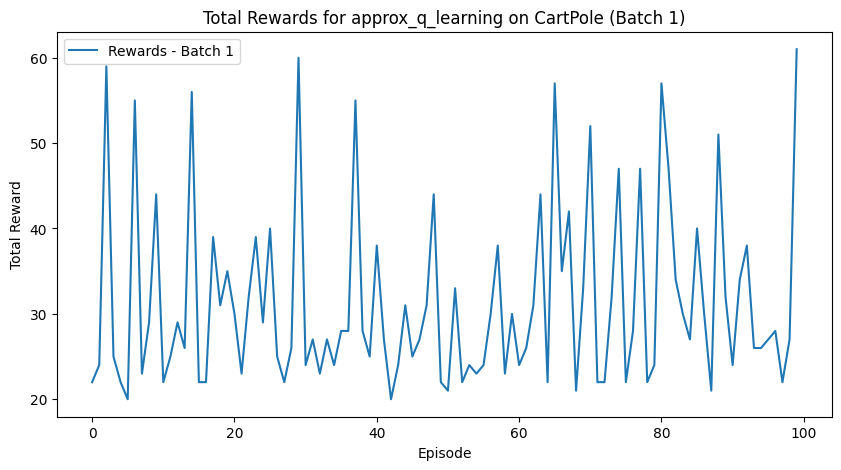

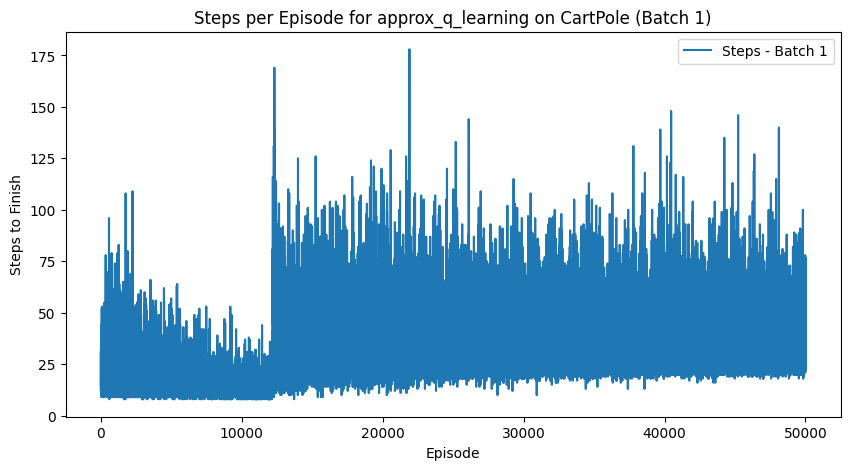

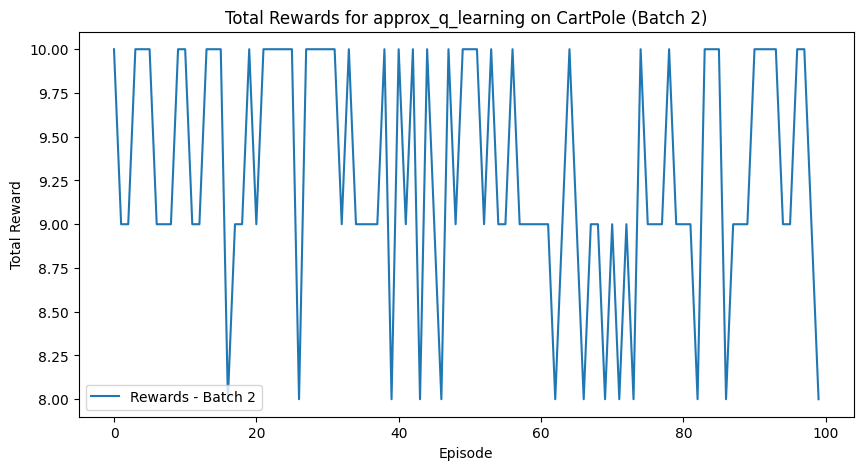

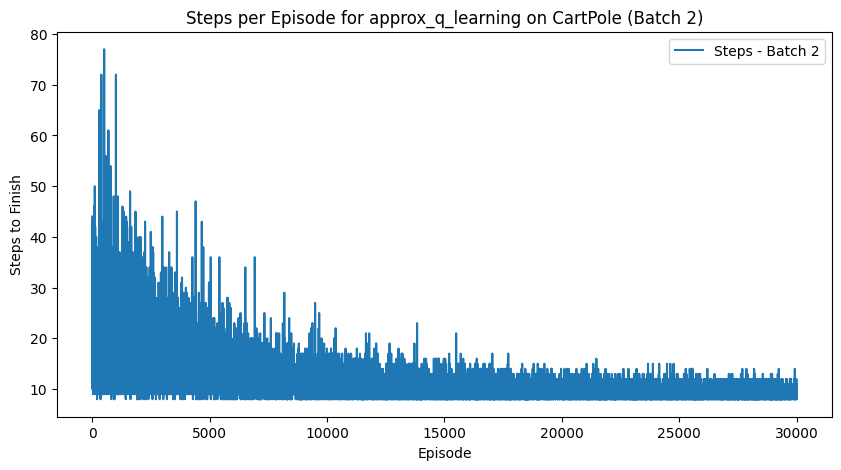

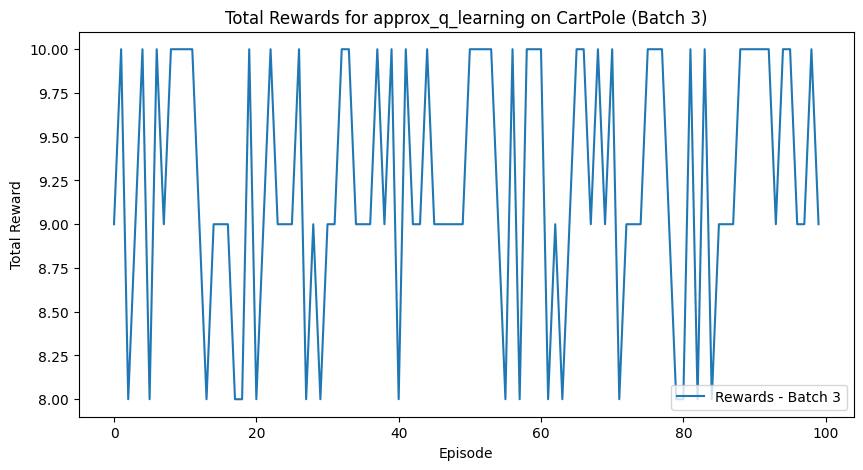

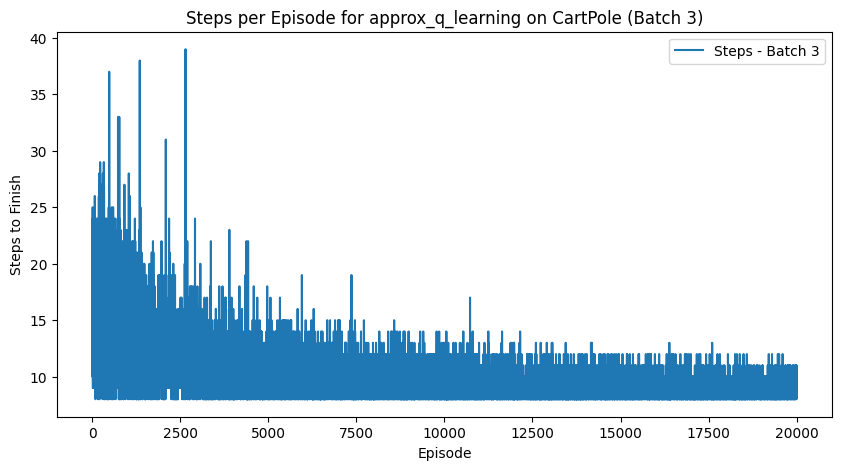

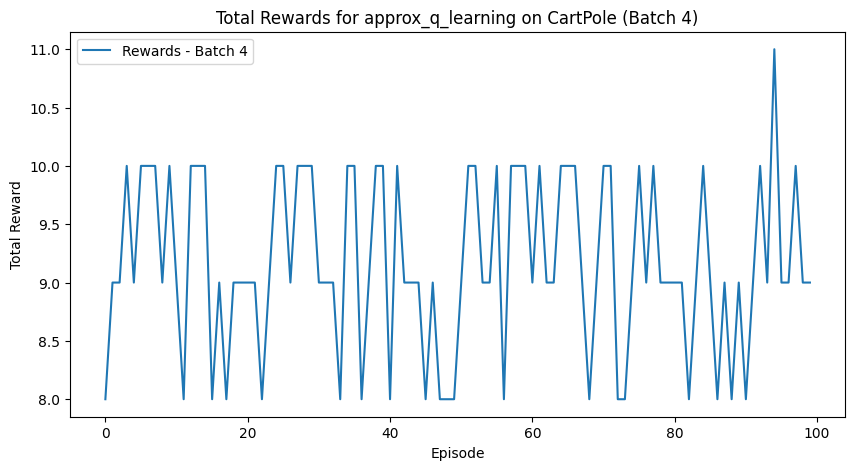

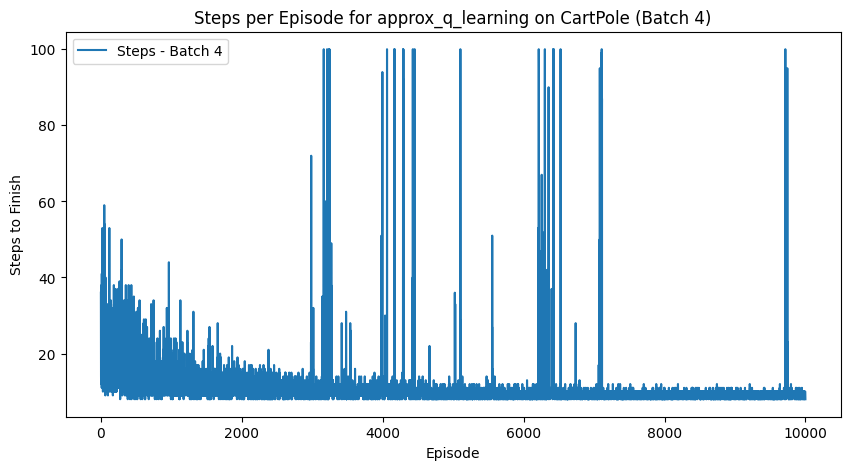

Average Rewards for approx_q_learning on CartPole:
  Batch 1: 32.55
  Batch 2: 9.17
  Batch 3: 9.28
  Batch 4: 9.16


In [130]:
domain = float(input("Enter 1 for Frozen Lake, 2 for CartPole: "))
algo = float(input("Enter 1 for Q_Learning, 2 for Approximate_Q_Learning: "))

selection = {
    1:"FrozenLake",
    2:"CartPole",
    3:"q_learning",
    4:"approx_q_learning"
}
plot_results(results, env_name=selection[domain], method=selection[algo+2])

# Evaluation Functions

In [113]:
# Frozen Lake Q-Learning
def evaluate_policy_qFL(env, policy, num_episodes=100):
    total_reward = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = policy[state]
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
    return total_reward / num_episodes

def evaluate_policy_qFL_plot(env, policy, num_episodes=100, max_steps=100):
    total_rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        for _ in range(max_steps):
            action = policy[state]  # Use learned policy
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
            if done:
                break
        total_rewards.append(total_reward)
    return total_rewards
# Frozen Lake Approx Q-Learning
def evaluate_approx_policy_approxqFL(env, policy, num_episodes=100):
    total_reward = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = policy[state]
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
    return total_reward / num_episodes

def evaluate_approx_policy_approxqFL_plot(env, policy, num_episodes=100, max_steps=100):
    total_rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        for _ in range(max_steps):
            action = policy[state]  # Use learned policy
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
            if done:
                break
        total_rewards.append(total_reward)
    return total_rewards

# CartPole Q-Learning
def evaluate_policy_qCP(env, policy, np_array_win_size, num_episodes=100, max_steps=100):
    total_reward = 0
    for _ in range(num_episodes):
        state, _ = env.reset()  # Reset the environment
        done = False
        while not done:
            # Discretize the current state to use the policy
            discrete_state = get_discrete_state(state, np_array_win_size)
            action = policy[discrete_state]  # Get the action from the policy
            state, reward, done, _, _ = env.step(action)  # Take the action
            total_reward += reward
    return total_reward / num_episodes

def evaluate_policy_qCP_plot(env, policy, np_array_win_size, num_episodes=100, max_steps=500):
    total_rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        for _ in range(max_steps):
            discrete_state = get_discrete_state(state, np_array_win_size)
            action = policy[discrete_state]  # Use the learned policy
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
            if done:
                break
        total_rewards.append(total_reward)
    return total_rewards

# CartPole Approx Q-Learning
def evaluate_approx_policy_approxqCP(env, best_action_fn, num_episodes=100):
    total_reward = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = best_action_fn(state) 
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
    return total_reward / num_episodes

def evaluate_approx_policy_approxqCP_plot(env, best_action_fn, num_episodes=100, max_steps=100):
    total_rewards = []
    for _ in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        for _ in range(max_steps):
            action = best_action_fn(state)  # Use the learned policy
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
            if done:
                break
        total_rewards.append(total_reward)
    return total_rewards

# Frozen Lake Domain Tests

In [87]:
import gymnasium as gym
import numpy as np

def q_learning(env, num_episodes=50000, alpha=0.5, gamma=0.99, epsilon=1.0, epsilon_decay=0.99995 , min_epsilon=0.01, max_steps=100):
    """
    Perform Q-learning to solve the FrozenLake environment.

    Parameters:
        env: Gymnasium environment (e.g., FrozenLake)
        num_episodes: Number of episodes to train
        alpha: Learning rate
        gamma: Discount factor (0 < gamma <= 1)
        epsilon: Exploration rate for ε-greedy policy
        epsilon_decay: Decay factor for epsilon after each episode
        min_epsilon: Minimum exploration rate
        max_steps: Maximum steps per episode.

    Returns:
        Q: Learned Q-table (state-action values)
        policy: Optimal policy derived from the Q-table
    """
    n_states = env.observation_space.n
    n_actions = env.action_space.n

    # Initialize Q-table (for state-action pairs)
    Q = np.zeros((n_states, n_actions))

    # Initialize policy
    policy = np.zeros(n_states, dtype=int)
    
    # To track steps per episode
    steps_per_episode = []

    for episode in range(num_episodes):
        state, _ = env.reset()   # Reset environment and get initial state
        step_count = 0  # Track steps for this episode
        
        for step in range(max_steps):
            # Choose an action using ε-greedy policy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore: random action
            else:
                action = np.argmax(Q[state])  # Exploit: best known action, 
                # example: Q = [[0.2, 0.5, 0.1, 0.0],  # Q-values for state 0, np.argmax(Q[state]) returns 1, because the maximum value 0.5 is at index 1.
            
            # Take the action and observe the result
            next_state, reward, done, _, _ = env.step(action)

            # Update the Q-value using the Q-learning update formula
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            
            # Move to the next state
            state = next_state
            step_count += 1
            # Break in case of going to an exit state
            if done:
                break
        # Decay epsilon after each episode
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        steps_per_episode.append(step_count)
        """ print(f"Episode {episode + 1}: Finished in {step_count} steps") """
        # Debugging: Print progress every 1000 episodes
        """ if episode % 1000 == 0:
            print(f"Episode {episode}, Epsilon: {epsilon:.3f}")
            print(f"Q-table (sample):\n{Q[:4]}")  # Print sample of Q-table """

    # Extract policy from the Q-values
    for s in range(n_states):
        policy[s] = np.argmax(Q[s, :])  # Choose action with the highest Q-value
    
    # Extract Value function from Q-table (max Q-values)
    V = np.max(Q, axis=1)

    return Q, V, policy, steps_per_episode

In [88]:
# Create the FrozenLake environment
env = gym.make('FrozenLake-v1', is_slippery=True)

# Run Q-learning with step tracking
q_table, v_values, policy, steps = q_learning(env)

print("\nSteps per Episode:")
print(steps)


Steps per Episode:
[2, 3, 9, 24, 7, 15, 14, 8, 5, 5, 2, 3, 3, 9, 9, 7, 7, 2, 19, 2, 8, 8, 4, 4, 19, 15, 6, 12, 11, 4, 10, 4, 16, 18, 6, 2, 4, 6, 7, 2, 20, 3, 4, 5, 6, 4, 8, 4, 20, 10, 3, 6, 3, 2, 21, 2, 5, 4, 3, 17, 9, 2, 4, 2, 5, 2, 17, 6, 2, 3, 6, 5, 8, 6, 9, 5, 11, 7, 5, 7, 4, 5, 15, 4, 2, 13, 8, 12, 9, 11, 9, 17, 8, 6, 8, 13, 18, 2, 5, 18, 13, 10, 2, 3, 3, 5, 6, 3, 6, 10, 6, 2, 11, 15, 12, 6, 5, 6, 5, 4, 25, 10, 28, 14, 12, 3, 5, 6, 2, 7, 6, 3, 6, 14, 3, 12, 3, 3, 4, 3, 3, 13, 5, 22, 4, 6, 13, 2, 2, 4, 11, 2, 3, 10, 3, 18, 13, 9, 5, 10, 12, 3, 6, 4, 11, 2, 11, 11, 2, 3, 12, 2, 2, 17, 5, 10, 3, 9, 4, 2, 2, 12, 3, 6, 2, 2, 17, 2, 5, 3, 4, 5, 9, 3, 9, 2, 11, 10, 5, 3, 3, 4, 17, 3, 12, 16, 2, 7, 14, 14, 13, 29, 4, 11, 3, 9, 16, 2, 10, 3, 15, 5, 18, 4, 4, 4, 7, 11, 4, 8, 5, 22, 3, 3, 4, 3, 2, 7, 13, 12, 12, 4, 16, 13, 8, 2, 7, 9, 10, 4, 7, 5, 7, 5, 3, 2, 3, 5, 5, 9, 15, 7, 9, 6, 4, 4, 9, 5, 5, 4, 6, 3, 7, 3, 9, 5, 10, 5, 4, 6, 7, 5, 7, 7, 3, 10, 4, 7, 5, 14, 5, 7, 10, 11, 7, 4, 3, 9, 4

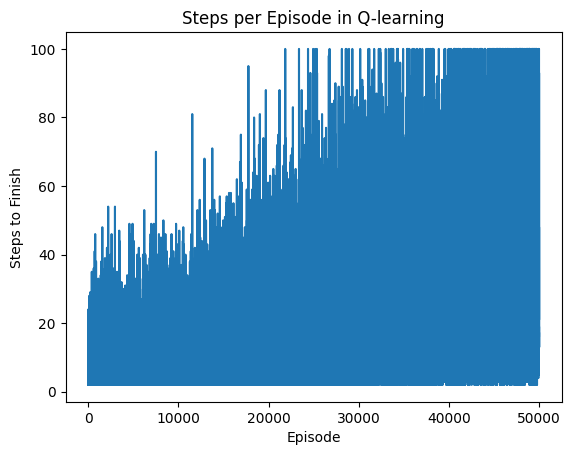

In [89]:
import matplotlib.pyplot as plt

plt.plot(steps)
plt.xlabel("Episode")
plt.ylabel("Steps to Finish")
plt.title("Steps per Episode in Q-learning")
plt.show()


In [92]:
# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=True)  # 'ansi' mode for text-based rendering
env.reset(seed=3)

average_reward = evaluate_policy_qFL(env, policy)
print("Average Reward from Q-Learning Policy:", average_reward)

Average Reward from Q-Learning Policy: 0.89


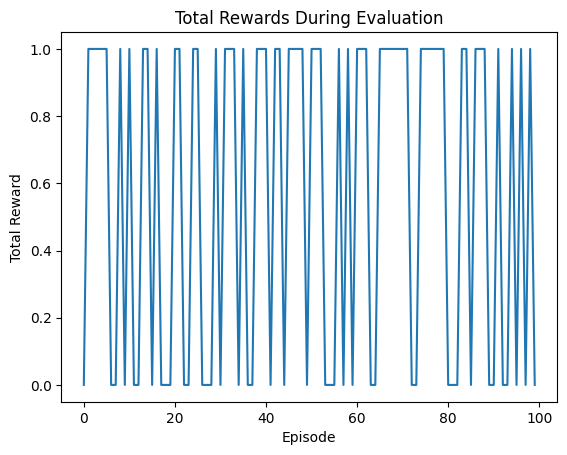

In [ ]:
# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=True)  # 'ansi' mode for text-based rendering
env.reset(seed=3)

# Evaluate the learned policy
num_eval_episodes = 100
eval_rewards = evaluate_policy_qFL_plot(env, policy, num_episodes=num_eval_episodes)

# Plot total rewards
import matplotlib.pyplot as plt

plt.plot(range(len(eval_rewards)), eval_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards During Evaluation")
plt.show()
env.close()

In [74]:
import gymnasium as gym
import numpy as np

def approximate_q_learning(env, num_episodes=50000, alpha=0.5, gamma=0.99, epsilon=1.0, epsilon_decay=0.99995 , min_epsilon=0.01, max_steps=100):
    """
    Perform approximate Q-learning with a linear function approximator.

    Parameters:
        env: Gymnasium environment (e.g., FrozenLake)
        num_episodes: Number of episodes to train
        alpha: Learning rate
        gamma: Discount factor (0 < gamma <= 1)
        epsilon: Exploration rate for ε-greedy policy
        epsilon_decay: Decay factor for epsilon after each episode
        min_epsilon: Minimum exploration rate
        max_steps: Maximum steps per episode.

    Returns:
        weights: Learned weights for the linear function approximator.
        policy: Optimal policy derived from the weights.
        V: State-value function derived from the learned weights.
    """
    n_states = env.observation_space.n
    n_actions = env.action_space.n

    # Initialize policy
    policy = np.zeros(n_states, dtype=int)

    # Initialize weights for the linear approximator
    weights = np.random.rand(n_states, n_actions)

    # To track steps per episode
    steps_per_episode = []

    def feature_vector(state):
        """Convert state to a feature vector (one-hot encoding)."""
        features = np.zeros(n_states)
        features[state] = 1
        return features

    def q_value(state, action):
        """Compute Q(s, a) using the linear function approximator."""
        features = feature_vector(state)
        return np.dot(features, weights[:, action])

    def best_action(state):
        """Return the action with the highest Q-value for a given state."""
        q_values = [q_value(state, a) for a in range(n_actions)]
        return np.argmax(q_values)

    def state_value(state):
        """Compute V(s) as max_a Q(s, a)."""
        q_values = [q_value(state, a) for a in range(n_actions)]
        return max(q_values)
    
    # Main loop
    for episode in range(num_episodes):
        state, _ = env.reset()   # Reset environment and get initial state
        step_count = 0  # Track steps for this episode

        for step in range(max_steps):
            # Choose an action using ε-greedy policy
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore: random action
            else:
                action = best_action(state)  # Exploit: best known action, 
                # example: Q = [[0.2, 0.5, 0.1, 0.0],  # Q-values for state 0, np.argmax(Q[state]) returns 1, because the maximum value 0.5 is at index 1.
            
            # Take the action and observe the result
            next_state, reward, done, _, _ = env.step(action)

            # Compute the TD target
            best_next_action = best_action(next_state)
            td_target = reward + gamma * q_value(next_state, best_next_action)
            
            # Compute the TD error
            td_error = td_target - q_value(state, action)

            # Update weights
            features = feature_vector(state)
            weights[:, action] += alpha * td_error * features

            # Move to the next state
            state = next_state
            step_count += 1

            # Break in case of going to an exit state
            if done:
                break
        # Decay epsilon after each episode
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        steps_per_episode.append(step_count)
        """ print(f"Episode {episode + 1}: Finished in {step_count} steps") """
        # Debugging: Print progress every 1000 episodes
        """ if episode % 1000 == 0:
            print(f"Episode {episode}, Epsilon: {epsilon:.3f}")
            print(f"Q-table (sample):\n{Q[:4]}")  # Print sample of Q-table """

    # Extract policy from the learned weights
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        policy[s] = best_action(s)

    # Calculate V-values (state-value function)
    V = np.zeros(n_states)
    for s in range(n_states):
        V[s] = state_value(s)

    return weights, policy, V, steps_per_episode

In [7]:
# Create the FrozenLake environment
env = gym.make('FrozenLake-v1', is_slippery=True)

# Run Q-learning with step tracking
weights, policy, v_values,steps = approximate_q_learning(env)

print("\nSteps per Episode:")
print(steps)


Steps per Episode:
[2, 17, 13, 6, 11, 2, 19, 3, 9, 6, 13, 11, 9, 5, 14, 3, 13, 26, 4, 6, 19, 6, 3, 6, 3, 5, 7, 12, 15, 4, 12, 12, 11, 11, 15, 3, 6, 9, 2, 8, 2, 7, 4, 4, 3, 11, 11, 6, 3, 5, 2, 27, 2, 12, 11, 5, 5, 9, 9, 3, 3, 8, 8, 7, 13, 12, 10, 2, 10, 4, 6, 3, 6, 6, 3, 2, 6, 14, 4, 3, 2, 4, 3, 2, 2, 3, 9, 4, 2, 2, 5, 15, 6, 7, 5, 6, 11, 12, 2, 7, 6, 6, 6, 10, 11, 4, 2, 7, 4, 9, 2, 2, 6, 7, 24, 7, 6, 3, 4, 2, 19, 2, 6, 2, 7, 2, 5, 4, 2, 9, 6, 10, 2, 5, 3, 9, 2, 9, 3, 2, 6, 8, 9, 4, 10, 2, 4, 5, 6, 4, 8, 12, 2, 8, 8, 9, 2, 2, 4, 3, 5, 3, 25, 9, 29, 2, 16, 8, 9, 4, 5, 3, 17, 4, 5, 21, 6, 13, 6, 3, 6, 3, 19, 3, 4, 30, 10, 4, 4, 5, 8, 18, 5, 4, 9, 6, 12, 20, 10, 4, 15, 6, 2, 2, 3, 5, 6, 3, 15, 2, 20, 3, 3, 12, 12, 6, 2, 4, 4, 10, 2, 11, 5, 2, 3, 4, 4, 6, 2, 24, 2, 6, 10, 4, 8, 6, 7, 4, 6, 4, 2, 11, 2, 12, 11, 18, 2, 4, 8, 14, 19, 3, 5, 3, 6, 9, 21, 5, 8, 11, 4, 6, 10, 3, 2, 5, 13, 4, 7, 9, 4, 6, 3, 12, 9, 7, 5, 2, 3, 3, 12, 2, 10, 7, 2, 8, 2, 3, 6, 11, 4, 15, 3, 4, 17, 29, 15, 7, 5, 7, 7,

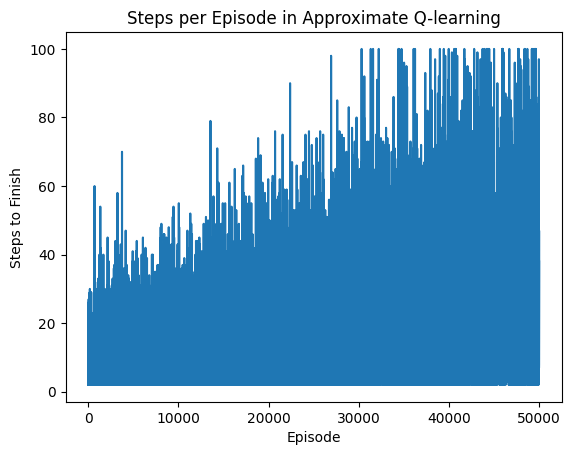

In [8]:
import matplotlib.pyplot as plt

plt.plot(steps)
plt.xlabel("Episode")
plt.ylabel("Steps to Finish")
plt.title("Steps per Episode in Approximate Q-learning")
plt.show()

In [94]:
# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=True)  # 'ansi' mode for text-based rendering
env.reset(seed=3)

average_reward = evaluate_approx_policy_approxqFL(env, policy)
print("Average Reward from Approximate Q-Learning Policy:", average_reward)

Average Reward from Approximate Q-Learning Policy: 0.89


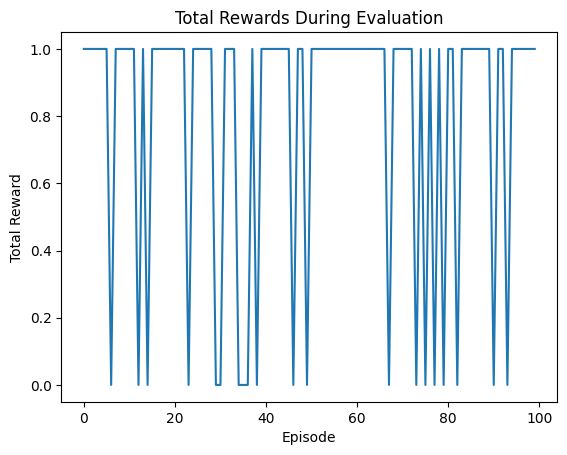

In [97]:
# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi', is_slippery=True)  # 'ansi' mode for text-based rendering
env.reset(seed=3)

# Evaluate the learned policy
num_eval_episodes = 100
eval_rewards = evaluate_approx_policy_approxqFL_plot(env, policy, num_episodes=num_eval_episodes)

# Plot total rewards
import matplotlib.pyplot as plt

plt.plot(range(len(eval_rewards)), eval_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards During Evaluation")
plt.show()
env.close()

# Cart Pole Domain Tests

In [103]:
import gymnasium as gym
import numpy as np

def get_discrete_state(state, np_array_win_size):
    """
    Convert a continuous state into a discrete state using scaling and offset.
    
    Parameters:
        state: Continuous state from the environment.
        np_array_win_size: Array defining the scaling factor for each dimension.
        
    Returns:
        Tuple representing the discrete state.
    """
    discrete_state = state / np_array_win_size + np.array([15, 10, 1, 10])  # Offset values
    return tuple(discrete_state.astype(int))

def q_learning2(env, num_episodes=5000, alpha=0.5, gamma=0.99, epsilon=1.0, epsilon_decay=0.99995 , min_epsilon=0.01, max_steps=100):
    """
    Perform basic Q-learning on the CartPole environment with discretized states.

    Parameters:
        env: Gymnasium environment (e.g., CartPole-v1)
        num_episodes: Number of episodes to train
        alpha: Learning rate
        gamma: Discount factor
        epsilon: Exploration rate
        epsilon_decay: Decay factor for epsilon after each episode
        min_epsilon: Minimum exploration rate
        max_steps: Maximum steps per episode.

    Returns:
        Q: Learned Q-table
        policy: Optimal policy derived from the Q-table
    """
    # Define the window size for each state dimension
    np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

    # Calculate the discrete state space size
    discrete_state_space_size = (30, 30, 50, 50)  # Number of discrete states (adjust as needed)
    n_actions = env.action_space.n

    # Initialize Q-table
    Q = np.zeros(discrete_state_space_size + (n_actions,))

    # To track steps per episode
    steps_per_episode = []

    for episode in range(num_episodes):
        state, _ = env.reset()  # Reset the environment
        discrete_state = get_discrete_state(state, np_array_win_size)  # Discretize the initial state
        total_reward = 0
        step_count = 0  # Track steps for this episode

        for step in range(max_steps):
            # Choose an action using epsilon-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Explore: random action
            else:
                action = np.argmax(Q[discrete_state])  # Exploit: best known action

            # Take the action and observe the result
            next_state, reward, done, _, _ = env.step(action)
            next_discrete_state = get_discrete_state(next_state, np_array_win_size)

            # Update the Q-value using the Q-learning formula
            best_next_action = np.argmax(Q[next_discrete_state])
            td_target = reward + gamma * Q[next_discrete_state][best_next_action]
            td_error = td_target - Q[discrete_state][action]
            Q[discrete_state][action] += alpha * td_error

            discrete_state = next_discrete_state
            total_reward += reward
            step_count += 1

            if done:
                break

        # Decay epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        steps_per_episode.append(step_count)
        """ print(f"Episode {episode + 1}: Finished in {step_count} steps") """

        # Debugging: Print progress every 100 episodes
        """ if episode % 100 == 0:
            print(f"Episode {episode}, Total Reward: {total_reward}, Epsilon: {epsilon:.3f}") """

    # Extract policy
    policy = np.argmax(Q, axis=-1)

    return Q, policy, steps_per_episode

In [105]:
# Create the environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Run Q-learning with step tracking
q_values, policy, steps = q_learning2(env)

print("\nSteps per Episode:")
print(steps)


Steps per Episode:
[32, 17, 20, 15, 23, 13, 14, 45, 20, 29, 19, 12, 21, 21, 28, 13, 58, 15, 10, 11, 12, 22, 26, 27, 15, 45, 35, 42, 23, 14, 15, 17, 20, 19, 22, 24, 50, 13, 43, 32, 16, 21, 57, 16, 12, 32, 14, 17, 11, 26, 27, 11, 20, 11, 16, 26, 15, 19, 17, 32, 9, 24, 14, 16, 27, 24, 18, 21, 19, 35, 14, 25, 11, 30, 14, 12, 10, 37, 18, 16, 11, 14, 9, 11, 15, 20, 21, 33, 26, 57, 23, 42, 21, 15, 12, 14, 53, 18, 33, 25, 13, 21, 17, 21, 33, 26, 15, 19, 17, 61, 17, 42, 12, 15, 30, 21, 26, 14, 24, 20, 13, 27, 21, 14, 32, 11, 22, 10, 11, 14, 12, 25, 48, 9, 10, 12, 24, 12, 20, 18, 18, 9, 12, 11, 27, 25, 39, 13, 23, 30, 21, 20, 25, 16, 19, 18, 22, 55, 25, 21, 13, 16, 29, 14, 13, 16, 14, 25, 17, 45, 24, 32, 25, 18, 23, 28, 29, 22, 21, 28, 19, 34, 14, 23, 14, 19, 41, 13, 16, 15, 41, 18, 15, 15, 20, 11, 19, 10, 26, 34, 67, 48, 16, 15, 11, 25, 18, 31, 43, 40, 29, 10, 37, 34, 20, 37, 17, 32, 15, 22, 17, 29, 14, 23, 13, 17, 14, 34, 14, 25, 11, 19, 10, 23, 12, 15, 11, 9, 17, 21, 25, 15, 11, 22, 39, 19, 

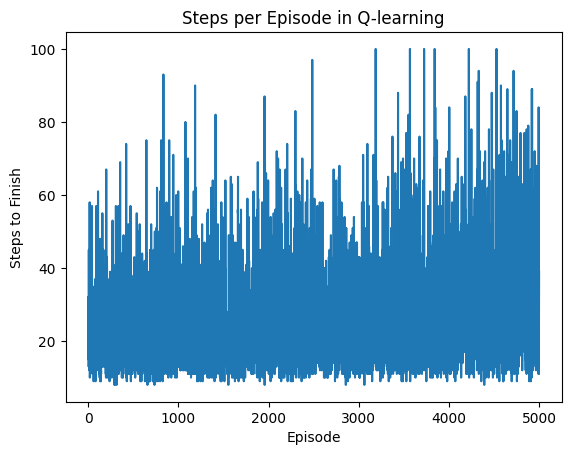

In [106]:
import matplotlib.pyplot as plt

plt.plot(steps)
plt.xlabel("Episode")
plt.ylabel("Steps to Finish")
plt.title("Steps per Episode in Q-learning")
plt.show()

In [107]:
# Create the environment
env = env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset(seed=3)

# Define the state discretization parameters (same as in training)
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

# Evaluate the learned policy
average_reward = evaluate_policy_qCP(env, policy, np_array_win_size)
print("Average Reward from Q-Learning Policy:", average_reward)

Average Reward from Q-Learning Policy: 172.33


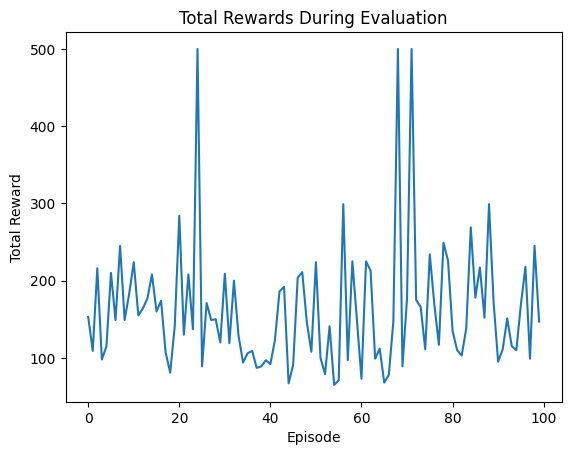

In [108]:
# Evaluate the learned policy
num_eval_episodes = 100
env = env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset(seed=3)
# Define the state discretization parameters (same as in training)
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

eval_rewards = evaluate_policy_qCP_plot(env, policy, np_array_win_size, num_episodes=num_eval_episodes)

# Plot total rewards
import matplotlib.pyplot as plt

plt.plot(range(len(eval_rewards)), eval_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards During Evaluation")
plt.show()
env.close()

In [16]:
import gymnasium as gym
import numpy as np
# best weights so far env, num_episodes=50000, alpha=0.001, gamma=0.95, epsilon=1.0, epsilon_decay=0.99995, min_epsilon=0.01, max_steps=100
def approximate_q_learning2(env, num_episodes=50000, alpha=0.001, gamma=0.95, epsilon=1.0, epsilon_decay=0.99995, min_epsilon=0.01, max_steps=100):
    """
    Perform approximate Q-learning with a linear function approximator for continuous state spaces.

    Parameters:
        env: Gymnasium environment (e.g., CartPole-v1)
        num_episodes: Number of episodes to train
        alpha: Learning rate
        gamma: Discount factor (0 < gamma <= 1)
        epsilon: Exploration rate for ε-greedy policy
        epsilon_decay: Decay factor for epsilon after each episode
        min_epsilon: Minimum exploration rate
        max_steps: Maximum steps per episode.

    Returns:
        weights: Learned weights for the linear function approximator.
        q_value_fn: A function to compute Q(s, a) for any state and action.
        policy: A function that computes the best action for any given state.
    """
    n_features = env.observation_space.shape[0]  # Number of state features
    n_actions = env.action_space.n  # Number of possible actions

    # Initialize weights for the linear approximator
    weights = np.random.rand(n_features, n_actions)

    # To track steps per episode
    steps_per_episode = []

    def q_value(state, action):
        """Compute Q(s, a) as a linear combination of state features."""
        return np.dot(state, weights[:, action])

    def best_action(state):
        """Return the action with the highest Q-value for a given state."""
        q_values = [q_value(state, a) for a in range(n_actions)]
        return np.argmax(q_values)

    # Main training loop
    for episode in range(num_episodes):
        state, _ = env.reset()  # Reset environment and get initial state
        total_reward = 0
        step_count = 0  # Track steps for this episode

        for step in range(max_steps):
            # Choose an action using ε-greedy policy
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = best_action(state)  # Exploit
            
            # Take the action and observe the result
            next_state, reward, done, _, _ = env.step(action)

            # Compute the TD target
            best_next_action = best_action(next_state)
            td_target = reward + gamma * q_value(next_state, best_next_action)

            # Compute the TD error
            td_error = td_target - q_value(state, action)

            # Update weights
            weights[:, action] += alpha * td_error * state

            # Move to the next state
            state = next_state
            total_reward += reward
            step_count += 1

            if done:
                break
        # Decay epsilon after each episode
        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        steps_per_episode.append(step_count)
        """ print(f"Episode {episode + 1}: Finished in {step_count} steps") """

        # Debugging: Print progress every 1000 episodes
        """ if episode % 1000 == 0:
            print(f"Episode {episode}, Epsilon: {epsilon:.3f}") """

    return weights, q_value, best_action, steps_per_episode

In [109]:
# Create the environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Apply Approximate Q-learning
weights, q_value_fn, best_action_fn, steps = approximate_q_learning2(env)

print("\nSteps per Episode:")
print(steps)
env.close()


Steps per Episode:
[14, 15, 13, 9, 17, 16, 22, 29, 14, 12, 35, 25, 16, 18, 17, 23, 15, 14, 15, 10, 18, 14, 22, 17, 25, 32, 17, 12, 28, 33, 27, 25, 25, 21, 26, 45, 14, 15, 13, 38, 45, 14, 16, 25, 10, 31, 21, 25, 16, 53, 13, 21, 33, 34, 22, 12, 24, 24, 18, 14, 61, 17, 12, 30, 12, 24, 16, 24, 39, 13, 11, 30, 8, 19, 27, 17, 21, 14, 17, 24, 16, 29, 20, 13, 57, 14, 11, 21, 15, 29, 14, 18, 19, 23, 9, 14, 16, 33, 14, 12, 12, 29, 17, 14, 22, 17, 16, 24, 24, 33, 20, 15, 38, 16, 13, 17, 15, 15, 17, 48, 16, 30, 12, 19, 40, 32, 29, 14, 29, 49, 26, 21, 14, 24, 11, 15, 15, 9, 17, 54, 17, 10, 14, 20, 11, 36, 17, 47, 12, 48, 15, 14, 47, 25, 22, 43, 23, 28, 36, 38, 19, 16, 23, 17, 23, 12, 38, 27, 13, 20, 19, 22, 21, 34, 12, 30, 19, 46, 11, 17, 16, 32, 12, 19, 20, 43, 12, 11, 37, 16, 27, 25, 20, 22, 33, 19, 17, 32, 17, 9, 14, 17, 13, 30, 11, 39, 27, 17, 18, 31, 20, 30, 34, 15, 27, 13, 18, 25, 14, 17, 24, 24, 20, 17, 33, 24, 36, 15, 40, 32, 17, 17, 14, 29, 12, 38, 15, 19, 14, 13, 9, 12, 16, 19, 11, 24, 3

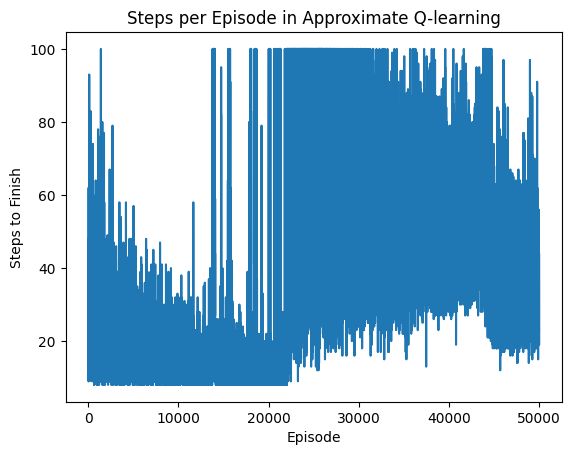

In [18]:
import matplotlib.pyplot as plt

plt.plot(steps)
plt.xlabel("Episode")
plt.ylabel("Steps to Finish")
plt.title("Steps per Episode in Approximate Q-learning")
plt.show()

In [111]:
# Create the environment
num_eval_episodes = 100
env = env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset(seed=3)

average_reward = evaluate_approx_policy_approxqCP(env, best_action_fn, num_episodes=num_eval_episodes )
print("Average Reward from Approx Q-Learning Policy:", average_reward)

Average Reward from Approx Q-Learning Policy: 33.05


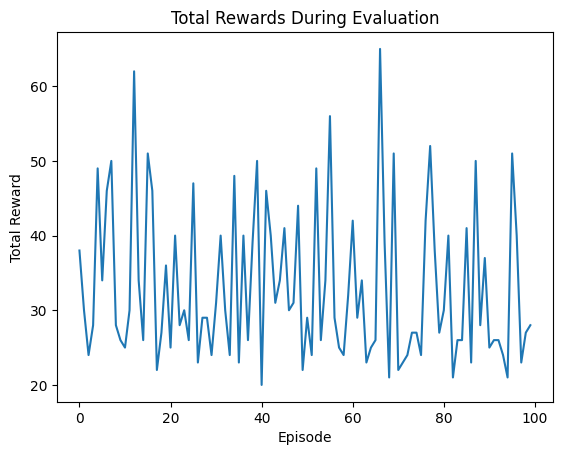

In [112]:
# Evaluate the learned policy
num_eval_episodes = 100
env = env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset(seed=3)
eval_rewards = evaluate_approx_policy_approxqCP_plot(env, best_action_fn, num_episodes=num_eval_episodes)

# Plot total rewards
import matplotlib.pyplot as plt

plt.plot(range(len(eval_rewards)), eval_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards During Evaluation")
plt.show()
env.close()

# Domain variables use cases tests

In [44]:
import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make('FrozenLake-v1', render_mode='ansi')

In [45]:
Q = np.zeros((env.observation_space.n, env.action_space.n))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [46]:
np.zeros([env.observation_space.n])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
np.zeros([env.action_space.n])

array([0., 0., 0., 0.])

In [48]:
Q[0] # Q-values for state 0

array([0., 0., 0., 0.])

In [49]:
Q[0,1] # Find the current Q-value: Q[state,action]

0.0

In [50]:
np.max(Q[0, :]) # Find the max Q-value for next_state

0.0

In [51]:
np.argmax(Q[0]) # example Q[state] = [0.2, 0.5, 0.1, 0.0] then np.argmax(Q[state]) returns 1, because the maximum value 0.5 is at index 1.

0

In [52]:
epsilon = 0.1
if np.random.uniform(0, 1) < epsilon:
    print("Explore")
else:
    print("Exploit")


Exploit


In [53]:
epsilon = 1
if np.random.uniform(0, 1) < epsilon:
    print("Explore")
else:
    print("Exploit")

Explore


In [54]:
env.close()